In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import scipy
from joblib import dump, load
from sklearn.preprocessing import PolynomialFeatures, Normalizer, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, LogisticRegression, LogisticRegressionCV

In [2]:
df = pd.read_csv('csvs/iris.csv')
df_copy = df.copy()
df_copy

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='species', ylabel='count'>

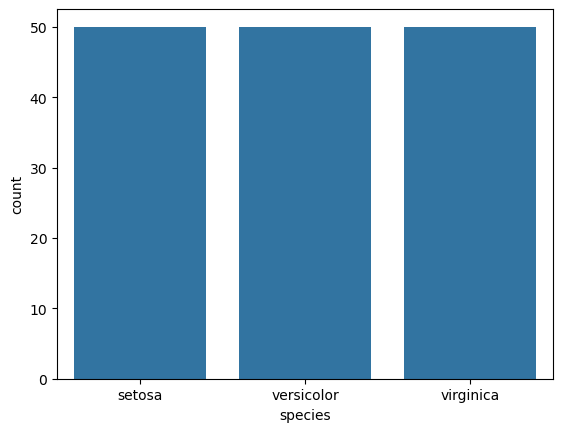

In [3]:
sns.countplot(data=df_copy, x='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

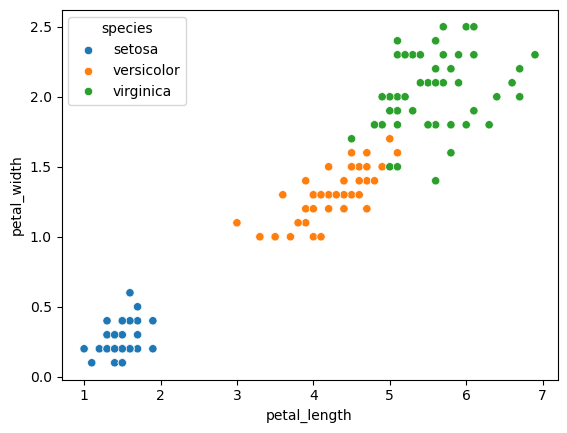

In [4]:
sns.scatterplot(data=df_copy, x='petal_length', y='petal_width', hue='species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

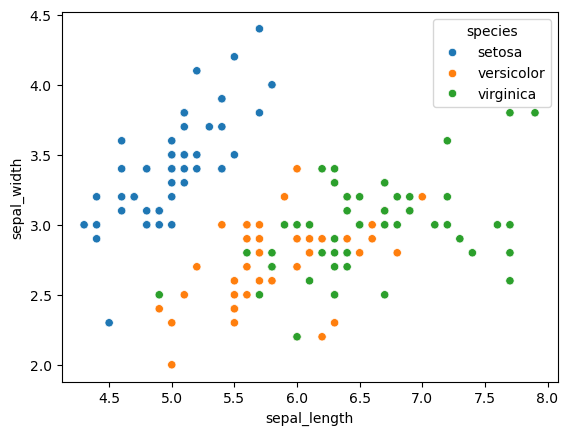

In [5]:
sns.scatterplot(data=df_copy, x='sepal_length', y='sepal_width', hue='species')

In [ ]:
X = df_copy.drop('species', axis=1)
y = df_copy['species']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Define the logistic regression model
log_model = LogisticRegressionCV(cv=5, max_iter=100, multi_class='ovr', solver='saga', penalty='l2', Cs=np.logspace(0, 4, 10))

# Train the model
log_model.fit(scaled_X_train, y_train)

In [7]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [8]:
log_model.predict_proba(scaled_X_test)

array([[9.91099216e-01, 8.90078382e-03, 2.78571296e-17],
       [9.85238486e-01, 1.47615140e-02, 9.35438056e-16],
       [9.56371791e-01, 4.36282094e-02, 4.24107363e-13],
       [1.33856316e-03, 4.05161076e-01, 5.93500361e-01],
       [5.54890430e-02, 9.40538573e-01, 3.97238426e-03],
       [2.01420860e-03, 3.41331349e-01, 6.56654443e-01],
       [1.42636932e-03, 7.16178697e-01, 2.82394933e-01],
       [1.42083511e-02, 9.75326496e-01, 1.04651533e-02],
       [7.07301796e-04, 3.72920010e-01, 6.26372688e-01],
       [7.79477093e-01, 2.20522907e-01, 1.61429591e-14],
       [2.33526891e-03, 1.90872379e-01, 8.06792352e-01],
       [9.84822838e-01, 1.51771621e-02, 3.13365145e-17],
       [9.26272572e-01, 7.37274283e-02, 2.36853776e-14],
       [6.36794830e-05, 3.88692332e-01, 6.11243989e-01],
       [8.80644530e-03, 2.60760799e-01, 7.30432755e-01],
       [4.48372471e-02, 9.53952809e-01, 1.20994427e-03],
       [1.96646316e-01, 8.02291001e-01, 1.06268360e-03],
       [1.05247888e-01, 8.92762

In [9]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



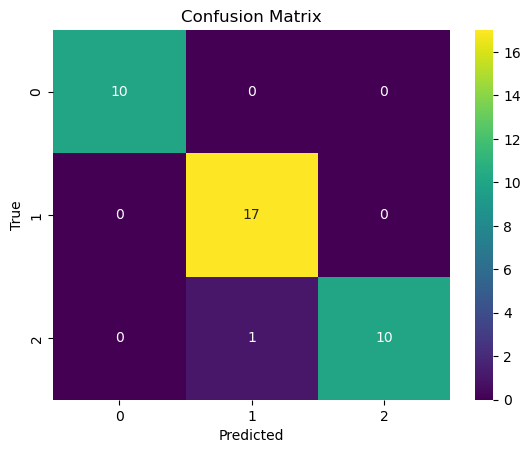

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')

plt.ylabel('True')

plt.show()

In [12]:
# Class Exercise - Logistic Regression

In [13]:
# Instructions:
# Use the ‘penguins’ dataset provided by Seaborn library, Your mission to predict the species of penguins
# based on selected features.
# perform Multi-class Logistic Regression machine learning modeling with the following instructions:
# ● Get the ‘penguins’ data set by running the following command:
# penguins = sns.load_dataset('penguins')

In [14]:
penguins = sns.load_dataset('penguins')

In [15]:
# Create a new dataset continuing only the following columns: ‘sex’, ‘body_mass_g’, ‘island’, ‘species’

In [16]:
penguins_df = penguins.loc[:, ['sex', 'body_mass_g', 'island', 'species']]
penguins_df.dropna(inplace=True)
penguins_df

,sex,body_mass_g,island,species
0,Male,3750.0,Torgersen,Adelie
1,Female,3800.0,Torgersen,Adelie
2,Female,3250.0,Torgersen,Adelie
4,Female,3450.0,Torgersen,Adelie
5,Male,3650.0,Torgersen,Adelie
...,...,...,...,...
338,Female,4925.0,Biscoe,Gentoo
340,Female,4850.0,Biscoe,Gentoo
341,Male,5750.0,Biscoe,Gentoo
342,Female,5200.0,Biscoe,Gentoo


In [17]:
# ● Apply cross-validation Logistic Regression to predict the type of new penguin according to the
# provided feature values.
# ● Use the ‘One-vs-All’ technique the ‘saga’ solver algorithm and L1 penalty

In [ ]:
X = penguins_df.drop('species', axis=1)
X_d = pd.get_dummies(X)
y = penguins_df['species']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.2, random_state=101)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Define the logistic regression model
log_model = LogisticRegressionCV(cv=5, max_iter=100, multi_class='ovr', solver='saga', penalty='l1', Cs=np.logspace(0, 4, 10))

# Train the model
log_model.fit(scaled_X_train, y_train)

In [19]:
# ● Print your model prediction, Accuracy, Precision, Recall and F1-score metrics
y_pred = log_model.predict(scaled_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.80      0.77      0.79        31
   Chinstrap       0.62      0.62      0.62        16
      Gentoo       0.95      1.00      0.98        20

    accuracy                           0.81        67
   macro avg       0.79      0.80      0.80        67
weighted avg       0.80      0.81      0.80        67



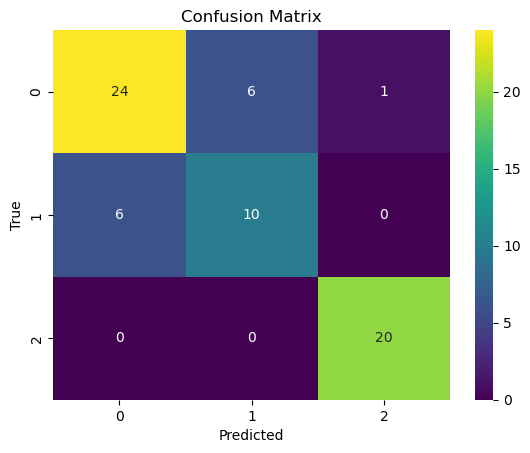

In [20]:
cm = confusion_matrix(y_test, y_pred)

cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')

plt.ylabel('True')

plt.show()

In [21]:
# In case your model is not accurate enough, think about ways to improve it (no need to change
# the code but just think about actions that could improve your model prediction)
# End of class exercise

In [22]:
# KNN - Introduction
# KNN - Python Example

In [23]:
df = pd.read_csv('csvs/gene_expression.csv')
df_copy  = df.copy()
df_copy.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


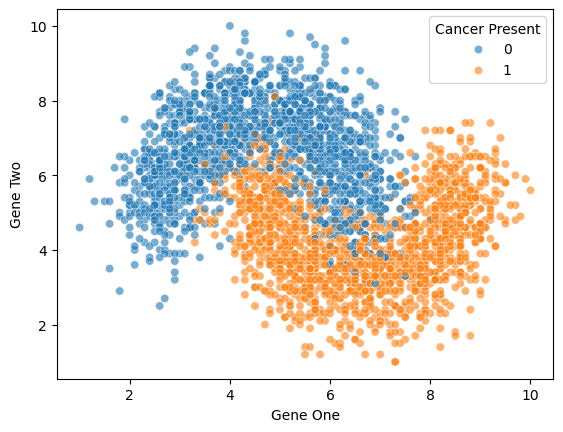

In [24]:
sns.scatterplot(data=df_copy, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6)
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

X = df_copy.drop('Cancer Present', axis=1)
y = df_copy['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred = knn_model.predict(scaled_X_test)
confusion_matrix(y_test, y_pred)

array([[422,  48],
       [ 50, 380]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [28]:
df_copy['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [29]:
# End of slide 52
# 19/02/2025